# Videogame Sales analysis

## Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file from https://www.kaggle.com/datasets/holmjason2/videogamedata
df1 = pd.read_csv('game_sales_data.csv', encoding='latin-1')

In [3]:
df2 = pd.read_csv('vgsales.csv')

In [4]:
df1.head()

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017


In [5]:
df1.shape

(19600, 9)

In [6]:
df1.columns

Index(['Rank', 'Name', 'Platform', 'Publisher', 'Developer', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Year'],
      dtype='object')

## Preparing an cleaning Data

Checking for null values

In [7]:
df1[df1.Platform.isnull() | df1.Name.isnull()]

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year


In [8]:
df1[df1.Publisher.isnull() | df1.Developer.isnull()]

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
10540,10539,Gourmet Chef: Cook Your Way to Fame,DS,Ubisoft,NaN,7.0,NaN,0.14,2008
12501,12500,Wordmaster,DS,"Destination Software, Inc",NaN,5.8,NaN,0.09,2008


In [9]:
len(df1[df1.Critic_Score.isnull()])

9631

In [10]:
len(df1[df1.User_Score.isnull()])

17377

I don't need the "Rank" column since it is the same as the index

In [11]:
df1 = df1.drop('Rank', axis=1)

In [12]:
df1.shape

(19600, 8)

## Sales analysis

### Sales per Year

In [17]:
sales_per_year = df1.groupby("Year")["Total_Shipped"].sum().sort_values(ascending=False)

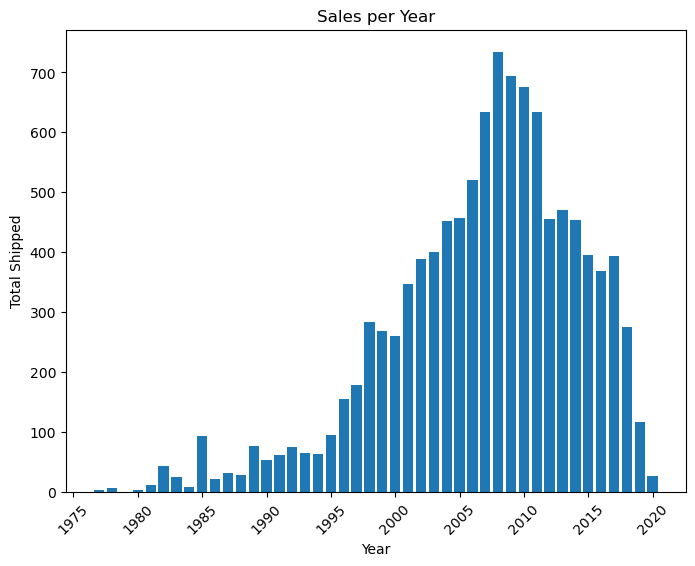

In [18]:
# Set the figsize
fig, ax = plt.subplots(figsize=(8, 6))

# Plot a bar plot
ax.bar(sales_per_year.index, sales_per_year)

# Set labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Total Shipped")
ax.set_title("Sales per Year")

# Adjusting x labels
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)

plt.show()

Checking the year of maximum and minimun sales

In [19]:
max_sales_value = sales_per_year.max()
max_sales_year = sales_per_year.idxmax()

min_sales_value = sales_per_year.min()
min_sales_year = sales_per_year.idxmin()

# Print
print("Maximum Sales:", max_sales_value)
print("Year of Maximum Sales:", max_sales_year)

print("Minumium Sales:", min_sales_value)
print("Year of Minimum Sales:", min_sales_year)

Maximum Sales: 734.62
Year of Maximum Sales: 2008
Minumium Sales: 0.31
Year of Minimum Sales: 1979


## Platform analysis

Checking how many games and how many sales there are per platform

In [13]:
# pivot table
pivot_platform = df1.pivot_table(
    index="Platform", 
    values=["Total_Shipped"], 
    aggfunc={"Total_Shipped": "sum", 
             "Platform": "count"}
)

# ordering and renaming
pivot_platform = pivot_platform.sort_values("Total_Shipped", ascending=False).rename(
    columns={'Platform': 'Cant_Games'})

pivot_platform.head()

,Cant_Games,Total_Shipped
Platform,,
PS2,2214,1257.71
PC,1913,1107.02
X360,1302,982.82
PS3,1368,965.52
Wii,1352,897.23


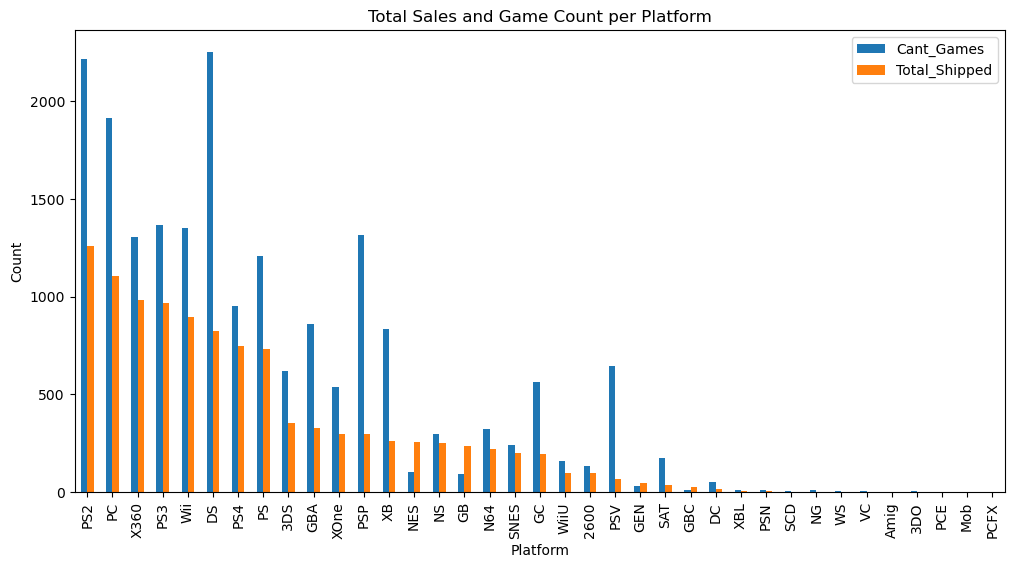

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create a bar plot of the pivot table
pivot_platform.plot(kind='bar', ax=ax)

# Set labels and title
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Total Sales and Game Count per Platform')

# Display the plot
plt.show()

We can see that **PS2, PC** and **DS** are the platforms with more games released  
and **PS2, PC, X360, PS3** and **Wii** are the platforms with most sales

We could check the average of sales per game for each platform

In [15]:
avg_shipped = df1.groupby("Platform")["Total_Shipped"].mean().sort_values(ascending=False)

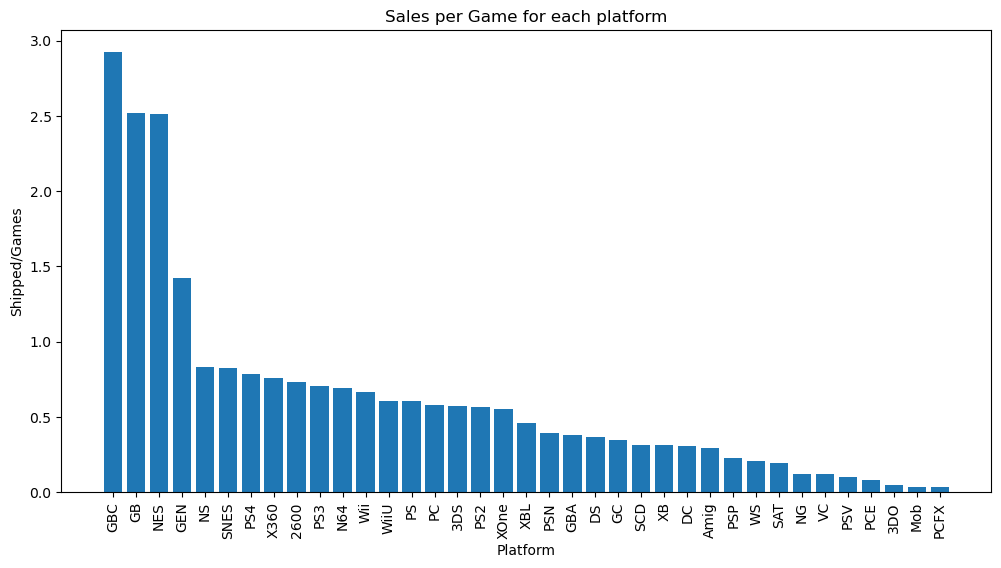

In [16]:
# Set the figsize
fig, ax = plt.subplots(figsize=(12, 6))

# Plot a bar plot
ax.bar(avg_shipped.index, avg_shipped)

# Set labels and title
ax.set_xlabel("Platform")
ax.set_ylabel("Shipped/Games")
ax.set_title("Sales per Game for each platform")

# Adjusting x labels
plt.xticks(rotation=90)

plt.show()

We can see that **GBC, GB, NES** and **GEN** are the Platforms that make the most sales per game released

## Platforms life

In [20]:
import altair as alt

Check from which year up to which year there are games released for the platform

In [42]:
# pivot table
pivot_years = df1.pivot_table(
    index="Platform", 
    values="Year", 
   aggfunc={"Year": ["max", "min"]}
)

# change name
pivot_years = pivot_years.rename(columns={'min': 'from',
                                         'max': "to"})

# Reorder the columns
pivot_years = pivot_years[["from", "to"]]
pivot_years = pivot_years.reset_index()

pivot_years.head()

,Platform,from,to
0,2600,1977,1990
1,3DO,1994,1995
2,3DS,2011,2019
3,Amig,2018,2018
4,DC,1998,2008


Timeline of the years a platform has been active

In [66]:
# Get the platforms from the first 10 rows of pivot_platform
top_platforms = pivot_platform.index[:10]

# Filter the pivot_years DataFrame to include only the top platforms
filtered_years = pivot_years[pivot_years['Platform'].isin(top_platforms)]

chart = alt.Chart(filtered_years).mark_bar().encode(
    x=alt.X('from:Q', scale=alt.Scale(domain=[1985, 2020])),
    x2='to:Q',
    y = alt.Y('Platform')
)

# configure chart
chart = chart.configure_axis(
    labelFontSize=12,
    titleFontSize=14
).properties(
    width=900,  # Set the desired width
    title='Top 10 platforms lifeterm'
)

chart

alt.Chart(...)

## Scores

Best rated games by critics

In [73]:
max_critics_score = df1.Critic_Score.max()
max_critics_score

10.0

In [81]:
df1.loc[df1.Critic_Score == max_critics_score]

,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
1,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985
5,Minecraft,PC,Mojang,Mojang AB,10.0,7.8,33.15,2010
40,Grand Theft Auto V,X360,Rockstar Games,Rockstar North,10.0,NaN,15.86,2013
85,Grand Theft Auto IV,X360,Rockstar Games,Rockstar North,10.0,NaN,11.09,2008
93,Grand Theft Auto IV,PS3,Rockstar Games,Rockstar North,10.0,9.0,10.57,2008
121,Super Mario Kart,SNES,Nintendo,Nintendo EAD,10.0,NaN,8.76,1992
300,The Legend of Zelda: A Link to the Past,SNES,Nintendo,Nintendo EAD,10.0,NaN,4.61,1992
1285,Final Fantasy II,SNES,Square,Square,10.0,NaN,1.70,1991
1327,The Legend of Zelda: Breath of the Wild,WiiU,Nintendo,Nintendo EPD,10.0,10.0,1.67,2017
1545,Final Fight,SNES,Capcom,Capcom,10.0,NaN,1.48,1991


Best rated games by users

In [79]:
max_user_score = df1.User_Score.max()
max_user_score

10.0

In [80]:
df1.loc[df1.User_Score == max_user_score]

,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
30,The Legend of Zelda: Breath of the Wild,NS,Nintendo,Nintendo EPD,9.9,10.0,17.41,2017
87,God of War (2018),PS4,Sony Interactive Entertainment,SIE Santa Monica Studio,9.7,10.0,11.00,2018
124,Final Fantasy X,PS2,Square,SquareSoft,9.0,10.0,8.60,2001
142,The Legend of Zelda: Ocarina of Time,N64,Nintendo,Nintendo EAD,9.9,10.0,7.60,1998
178,Red Dead Redemption,X360,Rockstar Games,Rockstar San Diego,9.5,10.0,6.50,2010
747,Kirby Star Allies,NS,Nintendo,HAL Laboratory,8.1,10.0,2.56,2018
930,Star Wars: Knights of the Old Republic,XB,LucasArts,BioWare Corp.,9.4,10.0,2.19,2003
1123,Dissidia: Final Fantasy,PSP,Square Enix,Square Enix,8.1,10.0,1.90,2009
1125,Monster Hunter Tri,Wii,Capcom,Capcom Production Studio 1,8.1,10.0,1.90,2010
1327,The Legend of Zelda: Breath of the Wild,WiiU,Nintendo,Nintendo EPD,10.0,10.0,1.67,2017


Critics and users agree this is a tiop game:

In [83]:
df1[(df1.User_Score == max_user_score) & (df1.Critic_Score == max_critics_score)]

,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
1327,The Legend of Zelda: Breath of the Wild,WiiU,Nintendo,Nintendo EPD,10.0,10.0,1.67,2017
